# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [183]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# cloudiness = []
# country = []
# date = []
# humidity = []
# lat = []
# lng = []
# max_temp = []
# wind_speed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [184]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "903d26752b488fa48ca6f1f79c75b184"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
for city in cities:
    print(f"city: {city}")

    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        pass

city: nikolskoye
city: chlorakas
city: kapaa
city: marondera
city: illoqqortoormiut
city: belushya guba
city: esperance
city: vostok
city: kloulklubed
city: georgetown
city: chuy
city: ushuaia
city: attawapiskat
city: choya
city: harper
city: vaini
city: hobart
city: kashi
city: yulara
city: trincomalee
city: jamestown
city: albany
city: birjand
city: ouesso
city: hammerfest
city: bunia
city: terrace bay
city: huittinen
city: marsa matruh
city: khatanga
city: north branford
city: mahebourg
city: sorland
city: pevek
city: sarab
city: cidreira
city: bowen
city: bengkulu
city: bambous virieux
city: aflu
city: burica
city: ahipara
city: hithadhoo
city: saskylakh
city: champerico
city: rikitea
city: robinson
city: altay
city: saldanha
city: yellowknife
city: kintampo
city: tessalit
city: atuona
city: tuatapere
city: mataura
city: busselton
city: dunedin
city: tabiauea
city: faanui
city: bluff
city: balkhash
city: butaritari
city: fuerte
city: taolanaro
city: bredasdorp
city: carnarvon
city:

city: lhokseumawe
city: hit
city: tuburan
city: hita
city: bloomington
city: puri
city: pandan niog
city: lata
city: galeana
city: waling
city: palmer
city: luxor
city: marawi
city: tabuk
city: cap malheureux
city: hazorasp
city: fevralsk
city: dudinka
city: manjeshwar
city: puerto del rosario
city: okha
city: adrar
city: warri
city: portoferraio
city: hobyo
city: kadykchan
city: maarianhamina
city: medicine hat
city: poum
city: alotau
city: okitipupa
city: fort nelson
city: yirol
city: vrangel
city: alice springs
city: nacala
city: tsabong
city: araouane
city: isangel
city: whitley bay
city: lensk
city: puerto leguizamo
city: yerbogachen
city: ulaanbaatar
city: rosetta
city: gamba
city: conakry
city: mana
city: placido de castro
city: posadas
city: talikota
city: nhlangano
city: ixtapa
city: saint-georges
city: tautira
city: nepa nagar
city: zaozerne
city: momcilgrad
city: tilichiki
city: dolbeau
city: hovd
city: tigre
city: tahta
city: kuytun
city: krasnooktyabrskiy
city: chernyshevs

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#output_data_file

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [185]:
#create dictionary 
weather_dict = {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
#create and print dataframe
weather_data = pd.DataFrame.from_dict(weather_dict, orient= 'index')
weather_data_clean = weather_data.transpose().dropna()
weather_data_clean

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,20,RU,1553822246,88,59.7,30.79,4,5
1,chlorakas,75,US,1553822301,73,22.08,-159.32,25,5.7
2,kapaa,0,ZW,1553822321,89,-18.19,31.55,13.96,1.67
3,marondera,75,TT,1553822215,88,10.24,-61.45,26.67,3.1
4,illoqqortoormiut,20,RU,1553822322,50,46.45,135.83,-4.9,1.3
5,belushya guba,75,PW,1553817000,74,7.04,134.26,27,5.7
6,esperance,40,GY,1553817600,88,6.8,-58.16,26,5.1
7,vostok,0,UY,1553822239,83,-33.69,-53.46,19.06,6.07
8,kloulklubed,40,AR,1553817600,47,-54.81,-68.31,14,7.2
9,georgetown,0,RU,1553822324,81,52.01,86.55,-9.8,1.75


In [186]:
#output data to .csv
weather_data.transpose().to_csv(output_data_file, sep='\t', encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

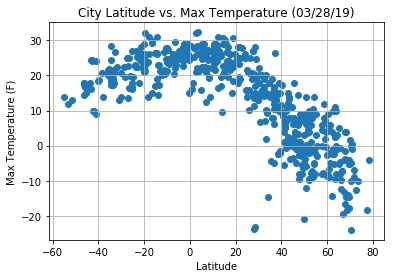

In [187]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean['Lat'], weather_data_clean['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

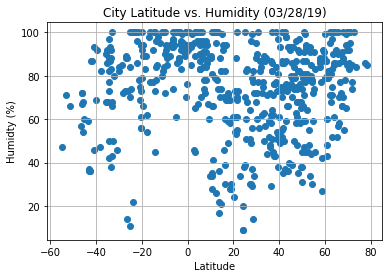

In [188]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean["Lat"], weather_data_clean["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/28/19)")
plt.ylabel("Humidty (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

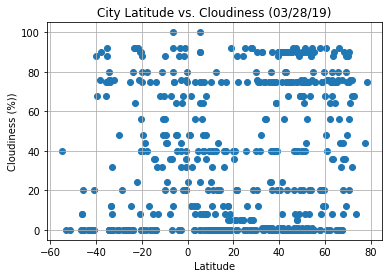

In [189]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean["Lat"], weather_data_clean["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/28/19)")
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

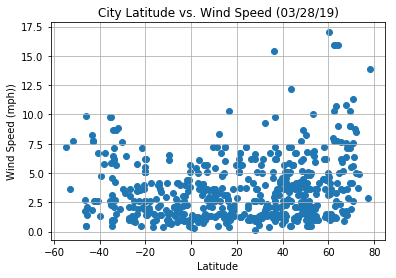

In [190]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean["Lat"], weather_data_clean["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/28/19)")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_windspeed.png")

# Show plot
plt.show()